<a href="https://colab.research.google.com/github/akscent/Hacks/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BF%D0%BE%D1%82%D1%80%D0%B5%D0%B1%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка

## Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as smt
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import ttest_1samp
from scipy.stats import shapiro

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

## Импорт и преобразование данных

### Обучающие данные

In [ ]:
file_path = '/content/drive/My Drive/Соревнования/Хакатон GlowByte/train_dataset.csv'

train_data = pd.read_csv(file_path)

train_data.head(5)

,date,time,target,temp,temp_pred,weather_pred,weather_fact
0,2019-01-01,0,481.510,2.9,2.0,"пасм, ветер",ветер
1,2019-01-01,1,462.872,2.9,2.0,"пасм, ветер",ветер
2,2019-01-01,2,449.718,2.9,2.0,"пасм, ветер",ветер
3,2019-01-01,3,430.908,4.3,2.0,"пасм, ветер","ветер, пасм"
4,2019-01-01,4,415.163,4.3,2.0,"пасм, ветер","ветер, пасм"


In [ ]:
train_data.tail(5)

,date,time,target,temp,temp_pred,weather_pred,weather_fact
37219,2023-03-31,19,552.960,7.9,6.0,"пасм, 61%","пасм, дымка"
37220,2023-03-31,20,563.985,7.9,6.0,"пасм, 61%","пасм, дымка"
37221,2023-03-31,21,560.191,6.3,5.0,"пасм, 61%","пасм, дымка"
37222,2023-03-31,22,538.796,6.3,5.0,"пасм, 61%","пасм, дымка"
37223,2023-03-31,23,518.685,6.3,5.0,"пасм, 61%","пасм, дымка"


In [ ]:
print(train_data.dtypes)

date             object
time              int64
target          float64
temp            float64
temp_pred       float64
weather_pred     object
weather_fact     object
dtype: object


In [ ]:
#Преобразуем формат object в datetime64
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d')

print(train_data.dtypes)

print()
print("Число строк и полей:")
print(train_data.shape)

date            datetime64[ns]
time                     int64
target                 float64
temp                   float64
temp_pred              float64
weather_pred            object
weather_fact            object
dtype: object

Число строк и полей:
(37224, 7)


### Тестовые данные

In [ ]:
file_path = '/content/drive/My Drive/Соревнования/Хакатон GlowByte/test_dataset.csv'

test_data = pd.read_csv(file_path)

test_data.head(5)

,date,time,target,temp,temp_pred,weather_pred,weather_fact
0,2023-04-01,0,479.282,5.7,5.0,"пасм, 58%","пасм, морось"
1,2023-04-01,1,445.182,5.7,5.0,"пасм, 58%","пасм, морось"
2,2023-04-01,2,424.225,5.7,5.0,"пасм, 58%","пасм, морось"
3,2023-04-01,3,413.866,5.0,4.0,"пасм, 71% дождь","пасм, дымка"
4,2023-04-01,4,408.146,5.0,4.0,"пасм, 71% дождь","пасм, дымка"


In [ ]:
test_data.tail(5)

,date,time,target,temp,temp_pred,weather_pred,weather_fact
2923,2023-07-31,19,453.173,17.2,18.0,"пасм, 24% дождь",п/обл
2924,2023-07-31,20,446.287,17.2,18.0,"пасм, 24% дождь",п/обл
2925,2023-07-31,21,444.373,15.8,17.0,"пасм, 24% дождь",п/обл
2926,2023-07-31,22,449.078,15.8,17.0,"пасм, 24% дождь",п/обл
2927,2023-07-31,23,416.078,15.8,17.0,"пасм, 24% дождь",п/обл


In [ ]:
print(test_data.dtypes)

date             object
time              int64
target          float64
temp            float64
temp_pred       float64
weather_pred     object
weather_fact     object
dtype: object


In [ ]:
#Преобразуем формат object в datetime64
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d')

print(test_data.dtypes)

print()
print("Число строк и полей:")
print(test_data.shape)

date            datetime64[ns]
time                     int64
target                 float64
temp                   float64
temp_pred              float64
weather_pred            object
weather_fact            object
dtype: object

Число строк и полей:
(2928, 7)


## EDA

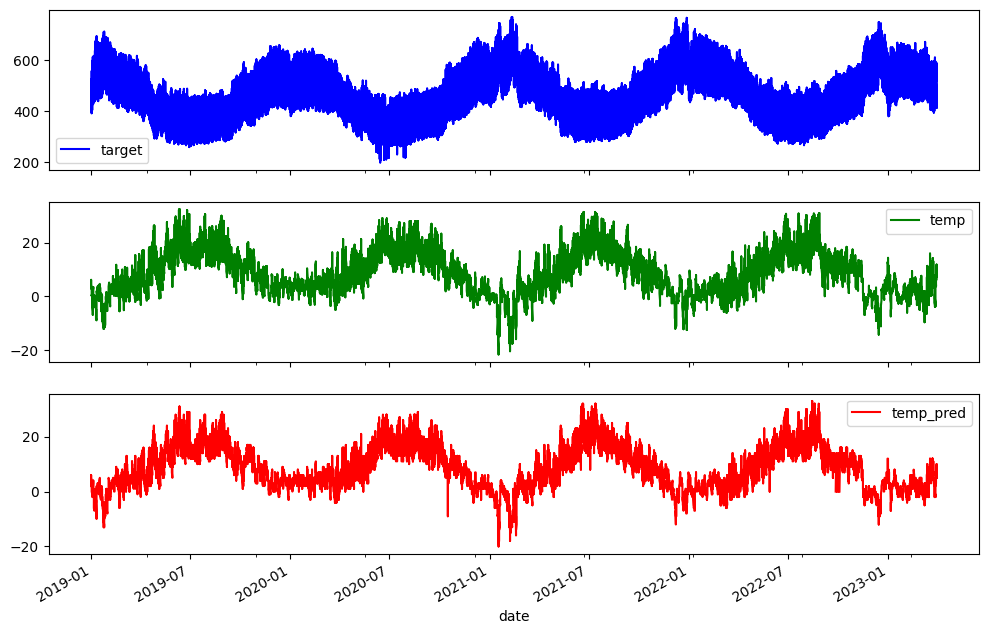

In [ ]:
train_data_1 = train_data.copy()


columns_to_drop = ["time", "weather_pred", "weather_fact"]
train_data_1.drop(columns=columns_to_drop, inplace=True)


train_data_1['date'] = pd.to_datetime(train_data_1['date'], format='%Y-%m-%d')


fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

train_data_1.plot(x='date', y='target', ax=axes[0], label='target', color='blue')

train_data_1.plot(x='date', y='temp', ax=axes[1], label='temp', color='green')

train_data_1.plot(x='date', y='temp_pred', ax=axes[2], label='temp_pred', color='red')

for ax in axes:
    ax.legend()

plt.show()

In [ ]:
# применим тест Дики-Фуллера для того, чтобы более количесвтенно понять насколько врем.ряд не стационарен

df_test_1 = adfuller(train_data['target'])
p_value = df_test_1[1]

print('p-value =', p_value)

alpha = 0.05
if p_value <= alpha:
    print("Временной ряд target стационарен (отвергаем нулевую гипотезу с уровнем значимости 0,05%)")
else:
    print("Временной ряд target не стационарен (нулевая гипотеза не может быть отвергнута с уровнем значимости 0,05%)")



df_test_2 = adfuller(train_data['temp'])
p_value = df_test_2[1]

print('p-value =', p_value)

alpha = 0.05
if p_value <= alpha:
    print("Временной ряд temp стационарен (отвергаем нулевую гипотезу с уровнем значимости 0,05%)")
else:
    print("Временной ряд temp не стационарен (нулевая гипотеза не может быть отвергнута с уровнем значимости 0,05%)")


df_test_3 = adfuller(train_data['temp'])
p_value = df_test_3[1]

print('p-value =', p_value)

alpha = 0.05
if p_value <= alpha:
    print("Временной ряд temp_pred стационарен (отвергаем нулевую гипотезу с уровнем значимости 0,05%)")
else:
    print("Временной ряд temp_pred не стационарен (нулевая гипотеза не может быть отвергнута с уровнем значимости 0,05%)")

p-value = 0.000264070646315223
Временной ряд target стационарен (отвергаем нулевую гипотезу с уровнем значимости 0,05%)
p-value = 1.2823337968784239e-08
Временной ряд temp стационарен (отвергаем нулевую гипотезу с уровнем значимости 0,05%)
p-value = 1.2823337968784239e-08
Временной ряд temp_pred стационарен (отвергаем нулевую гипотезу с уровнем значимости 0,05%)


In [ ]:
# Подготовка данных
y = train_data['target']

# Применение временного декомпозиционного анализа
result = sm.tsa.seasonal_decompose(y, model='additive', period=7)

# Вывод численных коэффициентов
trend_coefficient = result.trend.dropna().mean()
seasonal_coefficient = result.seasonal.dropna().mean()
residual_significance = result.resid.std()

# Проверка значимости коэффициента сезонности с использованием t-теста
t_stat_seasonal, p_value_seasonal = ttest_1samp(result.seasonal.dropna(), 0)

print("Коэффициент тренда:", trend_coefficient)
print()

print("Коэффициент сезонности:", seasonal_coefficient)
print("Значимость коэффициента сезонности (p-value):", p_value_seasonal)

Коэффициент тренда: 483.7291065567353

Коэффициент сезонности: -8.828304053736067e-06
Значимость коэффициента сезонности (p-value): 0.9927309528741382


In [ ]:
# Подготовка данных
y = train_data['target']

# Применение временного декомпозиционного анализа
result = sm.tsa.seasonal_decompose(y, model='additive', period=30)

# Вывод численных коэффициентов
trend_coefficient = result.trend.dropna().mean()
seasonal_coefficient = result.seasonal.dropna().mean()
residual_significance = result.resid.std()

# Проверка значимости коэффициента сезонности с использованием t-теста
t_stat_seasonal, p_value_seasonal = ttest_1samp(result.seasonal.dropna(), 0)

print("Коэффициент тренда:", trend_coefficient)
print()

print("Коэффициент сезонности:", seasonal_coefficient)
print("Значимость коэффициента сезонности (p-value):", p_value_seasonal)

Коэффициент тренда: 483.72397762049434

Коэффициент сезонности: 1.9931830825553892e-05
Значимость коэффициента сезонности (p-value): 0.9993560115466682


In [ ]:
# Подготовка данных
y = train_data['target']

# Применение временного декомпозиционного анализа
result = sm.tsa.seasonal_decompose(y, model='additive', period=90)

# Вывод численных коэффициентов
trend_coefficient = result.trend.dropna().mean()
seasonal_coefficient = result.seasonal.dropna().mean()
residual_significance = result.resid.std()

# Проверка значимости коэффициента сезонности с использованием t-теста
t_stat_seasonal, p_value_seasonal = ttest_1samp(result.seasonal.dropna(), 0)

print("Коэффициент тренда:", trend_coefficient)
print()

print("Коэффициент сезонности:", seasonal_coefficient)
print("Значимость коэффициента сезонности (p-value):", p_value_seasonal)

Коэффициент тренда: 483.6902595257117

Коэффициент сезонности: 0.0001789892006906787
Значимость коэффициента сезонности (p-value): 0.9942366064492734


In [ ]:
# Подготовка данных
y = train_data['target']

# Применение временного декомпозиционного анализа
result = sm.tsa.seasonal_decompose(y, model='additive', period=180)

# Вывод численных коэффициентов
trend_coefficient = result.trend.dropna().mean()
seasonal_coefficient = result.seasonal.dropna().mean()
residual_significance = result.resid.std()

# Проверка значимости коэффициента сезонности с использованием t-теста
t_stat_seasonal, p_value_seasonal = ttest_1samp(result.seasonal.dropna(), 0)

print("Коэффициент тренда:", trend_coefficient)
print()

print("Коэффициент сезонности:", seasonal_coefficient)
print("Значимость коэффициента сезонности (p-value):", p_value_seasonal)

Коэффициент тренда: 483.60125745164913

Коэффициент сезонности: 0.0003081546020087516
Значимость коэффициента сезонности (p-value): 0.9981523220122878


In [ ]:
# Подготовка данных
y = train_data['target']

# Применение временного декомпозиционного анализа
result = sm.tsa.seasonal_decompose(y, model='additive', period=365)

# Вывод численных коэффициентов
trend_coefficient = result.trend.dropna().mean()
seasonal_coefficient = result.seasonal.dropna().mean()
residual_significance = result.resid.std()

# Проверка значимости коэффициента сезонности с использованием t-теста
t_stat_seasonal, p_value_seasonal = ttest_1samp(result.seasonal.dropna(), 0)

print("Коэффициент тренда:", trend_coefficient)
print()

print("Коэффициент сезонности:", seasonal_coefficient)
print("Значимость коэффициента сезонности (p-value):", p_value_seasonal)

Коэффициент тренда: 483.35471123480926

Коэффициент сезонности: 1.0563075309473852e-05
Значимость коэффициента сезонности (p-value): 0.999188416336003


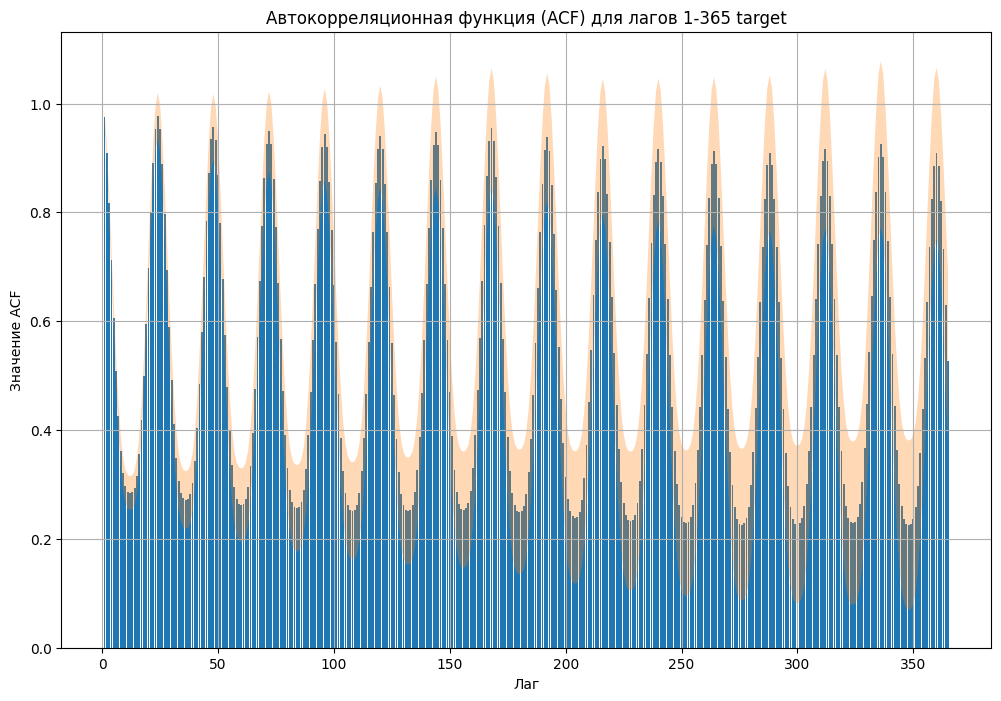

[365]
Первые 3 номера лагов со значимой автокорреляцией: [1, 2, 3]
Последние 5 номеров лагов со значимой автокорреляцией: [361, 362, 363, 364, 365]


In [ ]:
acf, confint = sm.tsa.acf(train_data['target'], nlags=365, alpha=0.05)
lags = range(1, 366)

# Построим график ACF
plt.figure(figsize=(12, 8))
plt.bar(lags, acf[1:])
plt.title('Автокорреляционная функция (ACF) для лагов 1-365 target')
plt.xlabel('Лаг')
plt.ylabel('Значение ACF')
plt.grid(True)

# Добавим доверительный интервал
plt.fill_between(lags, confint[1:, 0], confint[1:, 1], alpha=0.3)

plt.show()

# Найдем номера лагов с значимой автокорреляцией
significant_lags_meta = [lag for lag, (lower, upper) in zip(lags, confint[1:]) if lower > 0 or upper < 0]
meta_lags = significant_lags_meta[-1:]
print(meta_lags)

# Выведем только первые 3 и последние 3 значения
print("Первые 3 номера лагов со значимой автокорреляцией:", significant_lags_meta[:3])
print("Последние 5 номеров лагов со значимой автокорреляцией:", significant_lags_meta[-5:])

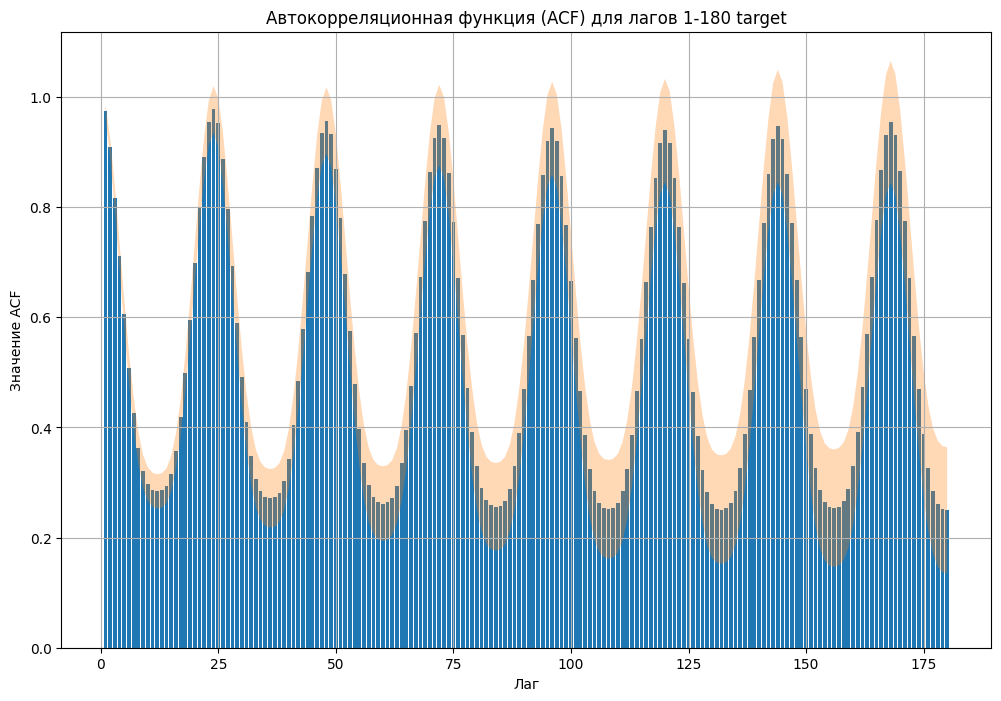

[180]
Первые 3 номера лагов со значимой автокорреляцией: [1, 2, 3]
Последние 5 номеров лагов со значимой автокорреляцией: [176, 177, 178, 179, 180]


In [ ]:
acf, confint = sm.tsa.acf(train_data['target'], nlags=180, alpha=0.05)
lags = range(1, 181)

# Построим график ACF
plt.figure(figsize=(12, 8))
plt.bar(lags, acf[1:])
plt.title('Автокорреляционная функция (ACF) для лагов 1-180 target')
plt.xlabel('Лаг')
plt.ylabel('Значение ACF')
plt.grid(True)

# Добавим доверительный интервал
plt.fill_between(lags, confint[1:, 0], confint[1:, 1], alpha=0.3)

plt.show()

# Найдем номера лагов с значимой автокорреляцией
significant_lags_meta = [lag for lag, (lower, upper) in zip(lags, confint[1:]) if lower > 0 or upper < 0]
meta_lags = significant_lags_meta[-1:]
print(meta_lags)

# Выведем только первые 3 и последние 3 значения
print("Первые 3 номера лагов со значимой автокорреляцией:", significant_lags_meta[:3])
print("Последние 5 номеров лагов со значимой автокорреляцией:", significant_lags_meta[-5:])

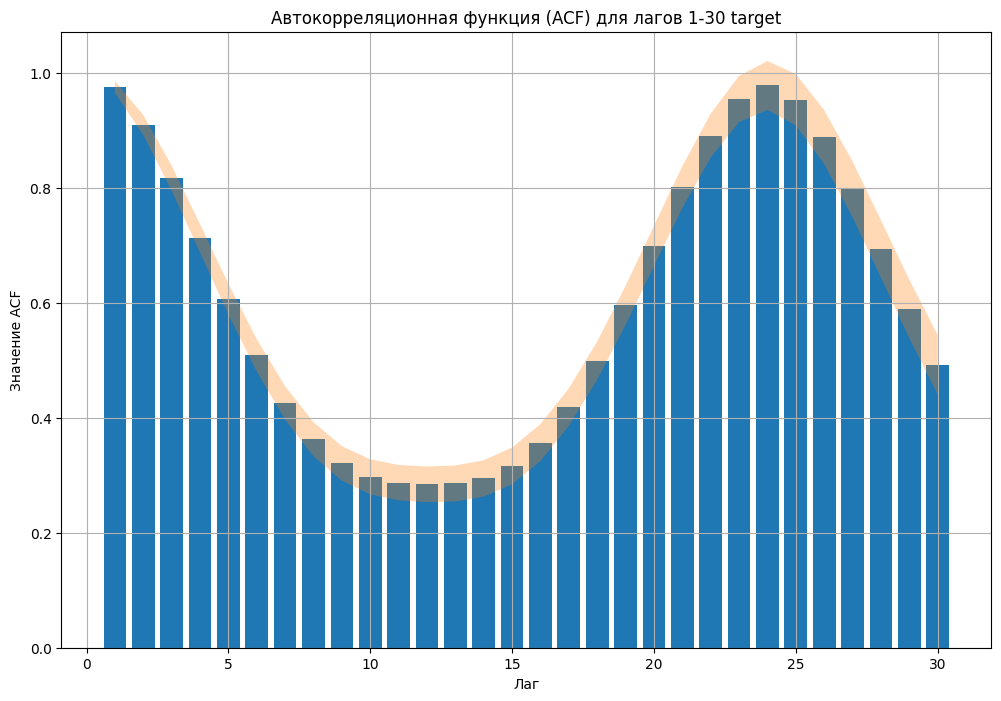

[30]
Первые 3 номера лагов со значимой автокорреляцией: [1, 2, 3]
Последние 5 номеров лагов со значимой автокорреляцией: [26, 27, 28, 29, 30]


In [ ]:
acf, confint = sm.tsa.acf(train_data['target'], nlags=30, alpha=0.05)
lags = range(1, 31)

# Построим график ACF
plt.figure(figsize=(12, 8))
plt.bar(lags, acf[1:])
plt.title('Автокорреляционная функция (ACF) для лагов 1-30 target')
plt.xlabel('Лаг')
plt.ylabel('Значение ACF')
plt.grid(True)

# Добавим доверительный интервал
plt.fill_between(lags, confint[1:, 0], confint[1:, 1], alpha=0.3)

plt.show()

# Найдем номера лагов с значимой автокорреляцией
significant_lags_meta = [lag for lag, (lower, upper) in zip(lags, confint[1:]) if lower > 0 or upper < 0]
meta_lags = significant_lags_meta[-1:]
print(meta_lags)

# Выведем только первые 3 и последние 3 значения
print("Первые 3 номера лагов со значимой автокорреляцией:", significant_lags_meta[:3])
print("Последние 5 номеров лагов со значимой автокорреляцией:", significant_lags_meta[-5:])

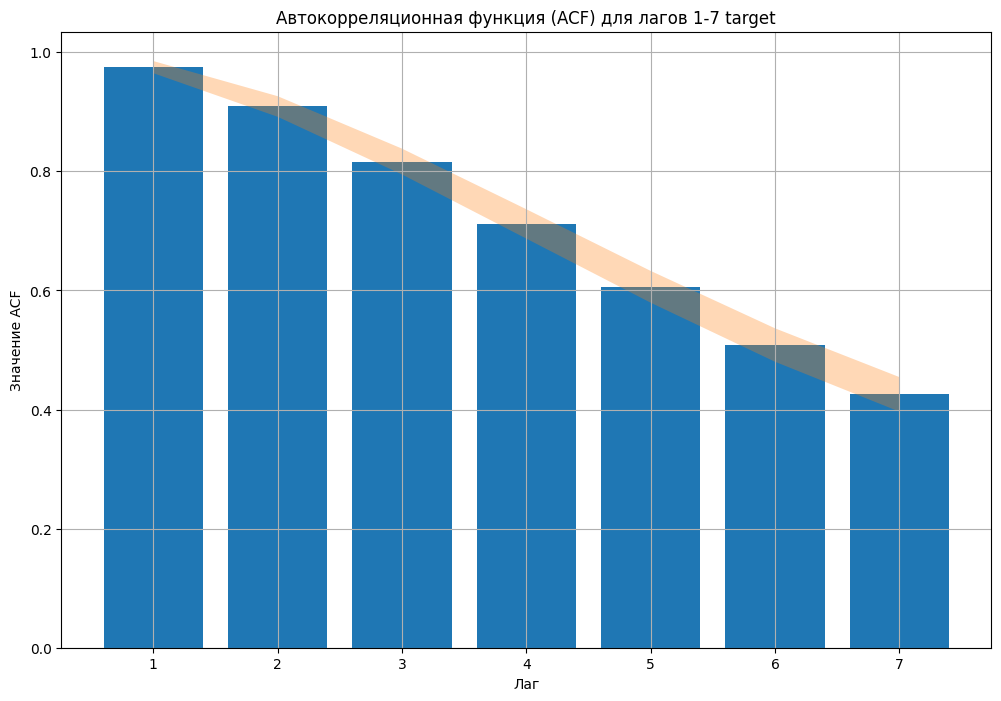

[7]
Первые 3 номера лагов со значимой автокорреляцией: [1, 2, 3]
Последние 5 номеров лагов со значимой автокорреляцией: [3, 4, 5, 6, 7]


In [ ]:
acf, confint = sm.tsa.acf(train_data['target'], nlags=7, alpha=0.05)
lags = range(1, 8)

# Построим график ACF
plt.figure(figsize=(12, 8))
plt.bar(lags, acf[1:])
plt.title('Автокорреляционная функция (ACF) для лагов 1-7 target')
plt.xlabel('Лаг')
plt.ylabel('Значение ACF')
plt.grid(True)

# Добавим доверительный интервал
plt.fill_between(lags, confint[1:, 0], confint[1:, 1], alpha=0.3)

plt.show()

# Найдем номера лагов с значимой автокорреляцией
significant_lags_meta = [lag for lag, (lower, upper) in zip(lags, confint[1:]) if lower > 0 or upper < 0]
meta_lags = significant_lags_meta[-1:]
print(meta_lags)

# Выведем только первые 3 и последние 3 значения
print("Первые 3 номера лагов со значимой автокорреляцией:", significant_lags_meta[:3])
print("Последние 5 номеров лагов со значимой автокорреляцией:", significant_lags_meta[-5:])

In [ ]:
acf, confint = sm.tsa.acf(train_data['target'], nlags=15000, alpha=0.05)
lags = range(1, 15001)

# Найдем номера лагов с значимой автокорреляцией
significant_lags = [lag for lag, (lower, upper) in zip(lags, confint[1:]) if lower > 0 or upper < 0]
lags = significant_lags[-1:]
print(lags)
print("Последние 5 номеров лагов со значимой автокорреляцией:", significant_lags[-5:])

[9984]
Последние 5 номеров лагов со значимой автокорреляцией: [9935, 9936, 9937, 9960, 9984]


In [ ]:
acf, confint = sm.tsa.acf(train_data['temp'], nlags=15000, alpha=0.05)
lags_2 = range(1, 15001)

# Найдем номера лагов с значимой автокорреляцией
significant_lags_2 = [lag for lag, (lower, upper) in zip(lags_2, confint[1:]) if lower > 0 or upper < 0]
lags_2 = significant_lags[-1:]
print(lags_2)
print("Последние 5 номеров лагов со значимой автокорреляцией:", significant_lags_2[-5:])

[9984]
Последние 5 номеров лагов со значимой автокорреляцией: [8665, 8687, 8688, 8689, 8712]


# Прогнозирование

## Генерация признаков

In [ ]:
train_data_2 = train_data.copy()

columns_to_drop = ["time", "weather_pred", "weather_fact"]
train_data_2.drop(columns=columns_to_drop, inplace=True)

scaler = StandardScaler()

train_data_2["temp"] = scaler.fit_transform(train_data_2[["temp"]].values)
train_data_2["temp_pred"] = scaler.fit_transform(train_data_2[["temp_pred"]].values)

# Создание новыех фич на основе скользящего среднего
for lag in range(1, 31):
    # Расчёт скользящего среднего с заданным лагом
    train_data_2[f'sma_temp{lag}'] = train_data_2['temp'].rolling(window=lag).mean()

# Создание новыех фич на основе скользящего среднего
for lag in range(1, 31):
    # Расчёт скользящего среднего с заданным лагом
    train_data_2[f'sma_temp_pred{lag}'] = train_data_2['temp_pred'].rolling(window=lag).mean()

train_data_2.head(10)

,date,target,temp,temp_pred,sma_temp1,sma_temp2,sma_temp3,sma_temp4,sma_temp5,sma_temp6,...,sma_temp_pred21,sma_temp_pred22,sma_temp_pred23,sma_temp_pred24,sma_temp_pred25,sma_temp_pred26,sma_temp_pred27,sma_temp_pred28,sma_temp_pred29,sma_temp_pred30
0,2019-01-01,481.510,-0.719822,-0.844285,-0.719822,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,462.872,-0.719822,-0.844285,-0.719822,-0.719822,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,449.718,-0.719822,-0.844285,-0.719822,-0.719822,-0.719822,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,430.908,-0.547527,-0.844285,-0.547527,-0.633675,-0.662390,-0.676748,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,415.163,-0.547527,-0.844285,-0.547527,-0.547527,-0.604959,-0.633675,-0.650904,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-01-01,403.195,-0.547527,-0.844285,-0.547527,-0.547527,-0.547527,-0.590601,-0.616445,-0.633675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-01-01,398.173,-0.424460,-0.719557,-0.424460,-0.485993,-0.506505,-0.516760,-0.557373,-0.584448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-01-01,402.689,-0.424460,-0.719557,-0.424460,-0.424460,-0.465482,-0.485993,-0.498300,-0.535221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-01-01,407.094,-0.424460,-0.719557,-0.424460,-0.424460,-0.424460,-0.455227,-0.473687,-0.485993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-01-01,414.565,-0.338312,-0.470100,-0.338312,-0.381386,-0.395744,-0.402923,-0.431844,-0.451124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_data_3 = train_data_2.drop(train_data_2.index[:30])
train_data_3.head(10)

,date,target,temp,temp_pred,sma_temp1,sma_temp2,sma_temp3,sma_temp4,sma_temp5,sma_temp6,...,sma_temp_pred21,sma_temp_pred22,sma_temp_pred23,sma_temp_pred24,sma_temp_pred25,sma_temp_pred26,sma_temp_pred27,sma_temp_pred28,sma_temp_pred29,sma_temp_pred30
30,2019-01-02,392.510,-0.867503,-0.844285,-0.867503,-0.818276,-0.801867,-0.793663,-0.771510,-0.756742,...,-0.487918,-0.487108,-0.497215,-0.506479,-0.515002,-0.527667,-0.539393,-0.550282,-0.560421,-0.569883
31,2019-01-02,405.998,-0.867503,-0.844285,-0.867503,-0.867503,-0.834685,-0.818276,-0.808431,-0.787509,...,-0.505737,-0.504117,-0.502638,-0.511676,-0.519991,-0.527667,-0.539393,-0.550282,-0.560421,-0.569883
32,2019-01-02,424.891,-0.867503,-0.844285,-0.867503,-0.867503,-0.867503,-0.842890,-0.828122,-0.818276,...,-0.523555,-0.521125,-0.518907,-0.516873,-0.524980,-0.532464,-0.539393,-0.550282,-0.560421,-0.569883
33,2019-01-02,450.377,-0.941344,-0.969014,-0.941344,-0.904423,-0.892117,-0.885963,-0.862580,-0.846992,...,-0.553252,-0.543803,-0.540599,-0.537661,-0.534959,-0.542059,-0.548633,-0.554737,-0.564721,-0.574040
34,2019-01-02,475.445,-0.941344,-0.969014,-0.941344,-0.941344,-0.916730,-0.904423,-0.897039,-0.875708,...,-0.582949,-0.572150,-0.562291,-0.558449,-0.554915,-0.551653,-0.557872,-0.563646,-0.569022,-0.578198
35,2019-01-02,509.816,-0.941344,-0.969014,-0.941344,-0.941344,-0.941344,-0.922884,-0.911807,-0.904423,...,-0.612647,-0.600498,-0.589405,-0.579237,-0.574872,-0.570842,-0.567111,-0.572555,-0.577624,-0.582356
36,2019-01-02,526.491,-0.953650,-0.969014,-0.953650,-0.947497,-0.945446,-0.944420,-0.929037,-0.918781,...,-0.642344,-0.628845,-0.616520,-0.605222,-0.594828,-0.590031,-0.585589,-0.581465,-0.586226,-0.590671
37,2019-01-02,525.171,-0.953650,-0.969014,-0.953650,-0.953650,-0.949548,-0.947497,-0.946266,-0.933139,...,-0.672041,-0.657193,-0.643635,-0.631208,-0.619774,-0.609220,-0.604068,-0.599283,-0.594828,-0.598986
38,2019-01-02,521.867,-0.953650,-0.969014,-0.953650,-0.953650,-0.953650,-0.950574,-0.948728,-0.947497,...,-0.701739,-0.685540,-0.670750,-0.657193,-0.644720,-0.633206,-0.622546,-0.617101,-0.612032,-0.607301
39,2019-01-02,520.315,-1.002878,-0.969014,-1.002878,-0.978264,-0.970060,-0.965957,-0.961035,-0.957753,...,-0.731436,-0.713887,-0.697865,-0.683178,-0.669665,-0.657193,-0.645644,-0.634920,-0.629236,-0.623932


In [ ]:
test_data_2 = test_data.copy()

columns_to_drop = ["time", "weather_pred", "weather_fact"]
test_data_2.drop(columns=columns_to_drop, inplace=True)

scaler = StandardScaler()

test_data_2["temp"] = scaler.fit_transform(test_data_2[["temp"]].values)
test_data_2["temp_pred"] = scaler.fit_transform(test_data_2[["temp_pred"]].values)

# Создание новыех фич на основе скользящего среднего
for lag in range(1, 31):
    # Расчёт скользящего среднего с заданным лагом
    test_data_2[f'sma_temp{lag}'] = test_data_2['temp'].rolling(window=lag).mean()

# Создание новыех фич на основе скользящего среднего
for lag in range(1, 31):
    # Расчёт скользящего среднего с заданным лагом
    test_data_2[f'sma_temp_pred{lag}'] = test_data_2['temp_pred'].rolling(window=lag).mean()

test_data_2.head(10)

,date,target,temp,temp_pred,sma_temp1,sma_temp2,sma_temp3,sma_temp4,sma_temp5,sma_temp6,...,sma_temp_pred21,sma_temp_pred22,sma_temp_pred23,sma_temp_pred24,sma_temp_pred25,sma_temp_pred26,sma_temp_pred27,sma_temp_pred28,sma_temp_pred29,sma_temp_pred30
0,2023-04-01,479.282,-1.245392,-1.396441,-1.245392,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-01,445.182,-1.245392,-1.396441,-1.245392,-1.245392,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-01,424.225,-1.245392,-1.396441,-1.245392,-1.245392,-1.245392,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-01,413.866,-1.353437,-1.553167,-1.353437,-1.299415,-1.281407,-1.272404,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-01,408.146,-1.353437,-1.553167,-1.353437,-1.353437,-1.317422,-1.299415,-1.288610,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-04-01,405.742,-1.353437,-1.553167,-1.353437,-1.353437,-1.353437,-1.326426,-1.310219,-1.299415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2023-04-01,411.929,-1.384307,-1.553167,-1.384307,-1.368872,-1.363727,-1.361155,-1.338002,-1.322567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2023-04-01,418.876,-1.384307,-1.553167,-1.384307,-1.384307,-1.374017,-1.368872,-1.365785,-1.345720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2023-04-01,451.236,-1.384307,-1.553167,-1.384307,-1.384307,-1.384307,-1.376590,-1.371959,-1.368872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023-04-01,497.727,-1.121912,-1.396441,-1.121912,-1.253110,-1.296842,-1.318709,-1.325654,-1.330285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_data_3 = test_data_2.drop(test_data_2.index[:30])
test_data_3.head(10)

,date,target,temp,temp_pred,sma_temp1,sma_temp2,sma_temp3,sma_temp4,sma_temp5,sma_temp6,...,sma_temp_pred21,sma_temp_pred22,sma_temp_pred23,sma_temp_pred24,sma_temp_pred25,sma_temp_pred26,sma_temp_pred27,sma_temp_pred28,sma_temp_pred29,sma_temp_pred30
30,2023-04-02,418.042,-1.754748,-1.866617,-1.754748,-1.762465,-1.765038,-1.766324,-1.770183,-1.772756,...,-1.754671,-1.738387,-1.730334,-1.722952,-1.716161,-1.709892,-1.704087,-1.698697,-1.688275,-1.678547
31,2023-04-02,420.147,-1.754748,-1.866617,-1.754748,-1.754748,-1.759893,-1.762465,-1.764009,-1.767610,...,-1.777060,-1.759759,-1.743963,-1.736013,-1.728699,-1.721948,-1.715697,-1.709892,-1.704488,-1.694219
32,2023-04-02,445.654,-1.754748,-1.866617,-1.754748,-1.754748,-1.754748,-1.758607,-1.760922,-1.762465,...,-1.799449,-1.781131,-1.764405,-1.749073,-1.741237,-1.734003,-1.727306,-1.721087,-1.715296,-1.709892
33,2023-04-02,492.630,-1.461483,-1.553167,-1.461483,-1.608115,-1.656993,-1.681432,-1.699182,-1.711015,...,-1.806912,-1.788255,-1.771219,-1.755603,-1.741237,-1.734003,-1.727306,-1.721087,-1.715296,-1.709892
34,2023-04-02,530.589,-1.461483,-1.553167,-1.461483,-1.461483,-1.559238,-1.608115,-1.637442,-1.659565,...,-1.814375,-1.795378,-1.778033,-1.762134,-1.747506,-1.734003,-1.727306,-1.721087,-1.715296,-1.709892
35,2023-04-02,550.170,-1.461483,-1.553167,-1.461483,-1.461483,-1.461483,-1.534799,-1.578789,-1.608115,...,-1.821839,-1.802502,-1.784847,-1.768664,-1.753775,-1.740031,-1.727306,-1.721087,-1.715296,-1.709892
36,2023-04-02,553.534,-0.982997,-1.239716,-0.982997,-1.222240,-1.301987,-1.341861,-1.424439,-1.479490,...,-1.806912,-1.795378,-1.778033,-1.762134,-1.747506,-1.734003,-1.721501,-1.709892,-1.704488,-1.699444
37,2023-04-02,550.646,-0.982997,-1.239716,-0.982997,-0.982997,-1.142492,-1.222240,-1.270088,-1.350865,...,-1.791986,-1.781131,-1.771219,-1.755603,-1.741237,-1.727976,-1.715697,-1.704295,-1.693679,-1.688995
38,2023-04-02,542.955,-0.982997,-1.239716,-0.982997,-0.982997,-0.982997,-1.102618,-1.174391,-1.222240,...,-1.777060,-1.766883,-1.757591,-1.749073,-1.734968,-1.721948,-1.709892,-1.698697,-1.688275,-1.678547
39,2023-04-02,536.582,-1.091042,-1.553167,-1.091042,-1.037019,-1.019012,-1.010008,-1.100303,-1.160500,...,-1.762134,-1.766883,-1.757591,-1.749073,-1.741237,-1.727976,-1.715697,-1.704295,-1.693679,-1.683771


## Обучение модели

In [ ]:
features = ["sma_temp{}".format(i) for i in range(1, 31)] + ["sma_temp_pred{}".format(i) for i in range(1, 31)]

# Разделяем данные на признаки (X) и целевую переменную (y) для обучения и тестирования
X_train = train_data_3[features]
y_train = train_data_3['target']
X_test = test_data_3[features]
y_test = test_data_3['target']

In [ ]:
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# Создайте и обучите модель линейной регрессии с L1 регуляризацией (Lasso)
lasso_model = Lasso(alpha=2.68)  # Задайте подходящее значение alpha
lasso_model.fit(X_train, y_train)

Lasso(alpha=2.68)

In [ ]:
# Делаем предсказания на тестовом наборе данных
y_pred = lasso_model.predict(X_test)

In [ ]:
# Вычисляем метрики оценки производительности модели
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("MAE (Mean Absolute Error):", mae)
print("RMSE (Root Mean Squared Error):", rmse)
print("R-squared (R2):", r2)

MAE (Mean Absolute Error): 67.99449474625807
RMSE (Root Mean Squared Error): 82.23552479680409
R-squared (R2): -0.33914543854660373


In [ ]:
target_test = scaler.inverse_transform(y_test.values.reshape(-1, 1))
target_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

In [ ]:
# Вычисляем метрики оценки производительности модели
mae = mean_absolute_error(target_test, target_pred)
rmse = np.sqrt(mean_squared_error(target_test, target_pred))
r2 = r2_score(target_test, target_pred)

# Вывод результатов
print("MAE (Mean Absolute Error):", mae)
print("RMSE (Root Mean Squared Error):", rmse)
print("R-squared (R2):", r2)

MAE (Mean Absolute Error): 433.84517904377657
RMSE (Root Mean Squared Error): 524.7113918909124
R-squared (R2): -0.33914543854660417
